In [29]:
#Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
df = pd.read_csv('https://media.githubusercontent.com/media/ducNguyenFSBmse/ducNguyenFSBmse/Data/train.csv');
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales'],
      dtype='object')

####**1) Tiền xử lý dữ liệu (xử lý các trường hợp thiếu dữ liệu, chuẩn hóa ngày tháng, đơn vị,...).**

In [31]:
df.shape

(9800, 18)

In [32]:
df.drop_duplicates()
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [33]:
df.shape

(9800, 18)

In [34]:
df.isnull().sum()

Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
dtype: int64

In [35]:
df[df['Postal Code'].isnull()]

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
2234,2235,CA-2018-104066,05/12/2018,10/12/2018,Standard Class,QJ-19255,Quincy Jones,Corporate,United States,Burlington,Vermont,NaN,East,TEC-AC-10001013,Technology,Accessories,Logitech ClearChat Comfort/USB Headset H390,205.03
5274,5275,CA-2016-162887,07/11/2016,09/11/2016,Second Class,SV-20785,Stewart Visinsky,Consumer,United States,Burlington,Vermont,NaN,East,FUR-CH-10000595,Furniture,Chairs,Safco Contoured Stacking Chairs,715.20
8798,8799,US-2017-150140,06/04/2017,10/04/2017,Standard Class,VM-21685,Valerie Mitchum,Home Office,United States,Burlington,Vermont,NaN,East,TEC-PH-10002555,Technology,Phones,Nortel Meridian M5316 Digital phone,1294.75
9146,9147,US-2017-165505,23/01/2017,27/01/2017,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,TEC-AC-10002926,Technology,Accessories,Logitech Wireless Marathon Mouse M705,99.98
9147,9148,US-2017-165505,23/01/2017,27/01/2017,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,OFF-AR-10003477,Office Supplies,Art,4009 Highlighters,8.04
9148,9149,US-2017-165505,23/01/2017,27/01/2017,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,OFF-ST-10001526,Office Supplies,Storage,Iceberg Mobile Mega Data/Printer Cart,1564.29
9386,9387,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-PA-10000157,Office Supplies,Paper,Xerox 191,79.92
9387,9388,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-PA-10001970,Office Supplies,Paper,Xerox 1881,12.28
9388,9389,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-AP-10000828,Office Supplies,Appliances,Avanti 4.4 Cu. Ft. Refrigerator,542.94
9389,9390,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-EN-10001509,Office Supplies,Envelopes,Poly String Tie Envelopes,2.04


In [36]:
df[df['Postal Code'].isnull()].iloc[0]

Row ID                                                  2235
Order ID                                      CA-2018-104066
Order Date                                        05/12/2018
Ship Date                                         10/12/2018
Ship Mode                                     Standard Class
Customer ID                                         QJ-19255
Customer Name                                   Quincy Jones
Segment                                            Corporate
Country                                        United States
City                                              Burlington
State                                                Vermont
Postal Code                                              NaN
Region                                                  East
Product ID                                   TEC-AC-10001013
Category                                          Technology
Sub-Category                                     Accessories
Product Name     Logitec

In [37]:
df.index

RangeIndex(start=0, stop=9800, step=1)

In [38]:
df['Postal Code'] = df['Postal Code'].fillna('05408')

####**2) Vẽ biểu đồ thể hiện biến động doanh số theo tháng. Cho biết doanh thu trung bình trong 3 tháng gần nhất.**

In [39]:
df['Order Date'] = pd.to_datetime(df['Order Date'],format='%d/%m/%Y')
df['Ship Date'] = pd.to_datetime(df['Ship Date'],format='%d/%m/%Y')
df.sort_values(by=['Order Date'],inplace=True)
df.head(3)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
7980,7981,CA-2015-103800,2015-01-03,2015-01-07,Standard Class,DP-13000,Darren Powers,Consumer,United States,Houston,Texas,77095.0,Central,OFF-PA-10000174,Office Supplies,Paper,"Message Book, Wirebound, Four 5 1/2"" X 4"" Form...",16.448
741,742,CA-2015-112326,2015-01-04,2015-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,Illinois,60540.0,Central,OFF-BI-10004094,Office Supplies,Binders,GBC Standard Plastic Binding Systems Combs,3.540
740,741,CA-2015-112326,2015-01-04,2015-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,Illinois,60540.0,Central,OFF-ST-10002743,Office Supplies,Storage,SAFCO Boltless Steel Shelving,272.736


In [40]:
df.tail(3)
processed_df = df.copy(deep=True)
processed_df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
7980,7981,CA-2015-103800,2015-01-03,2015-01-07,Standard Class,DP-13000,Darren Powers,Consumer,United States,Houston,Texas,77095.0,Central,OFF-PA-10000174,Office Supplies,Paper,"Message Book, Wirebound, Four 5 1/2"" X 4"" Form...",16.448
741,742,CA-2015-112326,2015-01-04,2015-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,Illinois,60540.0,Central,OFF-BI-10004094,Office Supplies,Binders,GBC Standard Plastic Binding Systems Combs,3.540
740,741,CA-2015-112326,2015-01-04,2015-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,Illinois,60540.0,Central,OFF-ST-10002743,Office Supplies,Storage,SAFCO Boltless Steel Shelving,272.736
739,740,CA-2015-112326,2015-01-04,2015-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,Illinois,60540.0,Central,OFF-LA-10003223,Office Supplies,Labels,Avery 508,11.784
1759,1760,CA-2015-141817,2015-01-05,2015-01-12,Standard Class,MB-18085,Mick Brown,Consumer,United States,Philadelphia,Pennsylvania,19143.0,East,OFF-AR-10003478,Office Supplies,Art,Avery Hi-Liter EverBold Pen Style Fluorescent ...,19.536


In [41]:
processed_df['Order by Year'] = pd.DatetimeIndex(processed_df['Order Date']).year
processed_df['Order by Month'] = pd.DatetimeIndex(processed_df['Order Date']).month

processed_df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Order by Year,Order by Month
7980,7981,CA-2015-103800,2015-01-03,2015-01-07,Standard Class,DP-13000,Darren Powers,Consumer,United States,Houston,Texas,77095.0,Central,OFF-PA-10000174,Office Supplies,Paper,"Message Book, Wirebound, Four 5 1/2"" X 4"" Form...",16.448,2015,1
741,742,CA-2015-112326,2015-01-04,2015-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,Illinois,60540.0,Central,OFF-BI-10004094,Office Supplies,Binders,GBC Standard Plastic Binding Systems Combs,3.540,2015,1
740,741,CA-2015-112326,2015-01-04,2015-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,Illinois,60540.0,Central,OFF-ST-10002743,Office Supplies,Storage,SAFCO Boltless Steel Shelving,272.736,2015,1
739,740,CA-2015-112326,2015-01-04,2015-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,Illinois,60540.0,Central,OFF-LA-10003223,Office Supplies,Labels,Avery 508,11.784,2015,1
1759,1760,CA-2015-141817,2015-01-05,2015-01-12,Standard Class,MB-18085,Mick Brown,Consumer,United States,Philadelphia,Pennsylvania,19143.0,East,OFF-AR-10003478,Office Supplies,Art,Avery Hi-Liter EverBold Pen Style Fluorescent ...,19.536,2015,1


In [42]:
total_sale_by_month = processed_df.groupby(['Order by Year', 'Order by Month'])['Sales'].sum().reset_index(name='Total Sales')
total_sale_by_month = total_sale_by_month.rename({'Order by Year' : 'Year', 'Order by Month' : 'Month'}, axis=1)
total_sale_by_month

,Year,Month,Total Sales
0,2015,1,14205.7070
1,2015,2,4519.8920
2,2015,3,55205.7970
3,2015,4,27906.8550
4,2015,5,23644.3030
5,2015,6,34322.9356
6,2015,7,33781.5430
7,2015,8,27117.5365
8,2015,9,81623.5268
9,2015,10,31453.3930


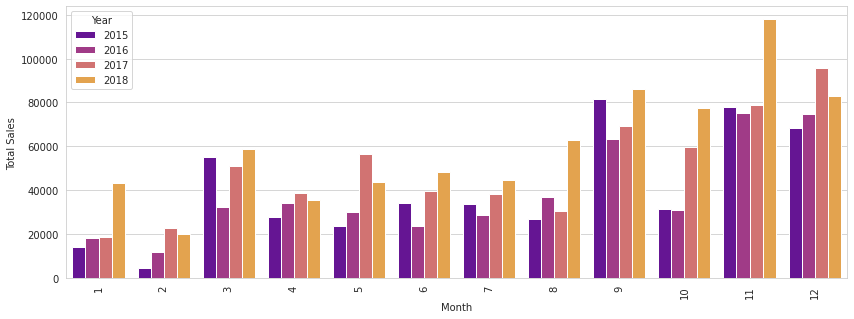

In [43]:
#Vẽ biểu đồ thể hiện biến động doanh số theo tháng. 
sns.set_style('whitegrid')
sns.axes_style(style='ticks')
fig, ax = plt.subplots(1, figsize=(14,5))

sns.barplot(x = 'Month', y='Total Sales', hue='Year', data=total_sale_by_month, 
            palette='plasma', ax=ax)

plt.xticks(rotation=90)
plt.show()

In [44]:
#Cho biết doanh thu trung bình trong 3 tháng gần nhất
average_sales_in_last_3_months = total_sale_by_month.nsmallest(3,'Total Sales')['Total Sales'].mean()
print("Doanh thu trung bình trong 3 tháng gần nhất: $" + str(average_sales_in_last_3_months))

Doanh thu trung bình trong 3 tháng gần nhất: $10225.67


####**3) Vẽ biểu đồ doanh số bán hàng theo quý và cho biết quý nào có tổng doanh số cao nhất.**

In [45]:
total_sale_by_quarter = processed_df.groupby([processed_df['Order Date'].dt.to_period('Q'), 'Order by Year'])['Sales'].sum().reset_index()
total_sale_by_quarter.columns = ['Quarter', 'Order by Year', 'Total Sales']
total_sale_by_quarter = total_sale_by_quarter.rename({'Order by Year': 'Year'}, axis=1)
total_sale_by_quarter['Quarter'] = total_sale_by_quarter['Quarter'].map(lambda val: "Q{}".format(val.quarter) )
total_sale_by_quarter

,Quarter,Year,Total Sales
0,Q1,2015,73931.3960
1,Q2,2015,85874.0936
2,Q3,2015,142522.6063
3,Q4,2015,177528.1122
4,Q1,2016,62357.6870
5,Q2,2016,87713.3730
6,Q3,2016,128560.2072
7,Q4,2016,180804.7382
8,Q1,2017,92686.3650
9,Q2,2017,135061.1610


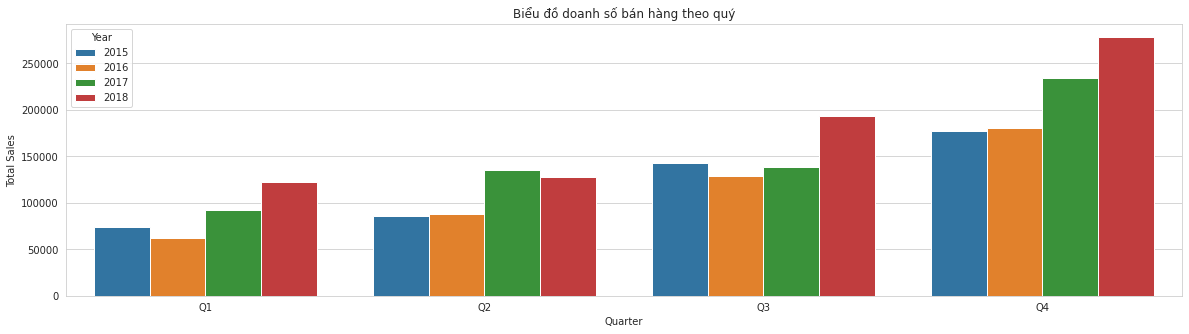

In [46]:
#Vẽ biểu đồ thể hiện doanh thu theo từng quý giữa các năm.
fig, ax = plt.subplots(1, figsize=(20,5))
ax = sns.barplot(x = 'Quarter', y='Total Sales', hue='Year', data=total_sale_by_quarter)
plt.title("Biểu đồ doanh số bán hàng theo quý")
plt.show()

In [47]:
#Cho biết quý có tổng doanh số cao nhất
top_total_sales_by_quarter = total_sale_by_quarter.max()
print("Quý có tổng doanh số cao nhất: \n")
top_total_sales_by_quarter

Quý có tổng doanh số cao nhất: 



Quarter                Q4
Year                 2018
Total Sales    278416.675
dtype: object

####**4) Tính thời gian giao hàng trung bình (ship date - order date) theo từng tháng và vẽ biểu đồ mô tả sự biến thiên của con số này.**

In [48]:
newly_created_df = processed_df.copy(deep=True)
newly_created_df['Delivery Duration'] = newly_created_df['Ship Date'] - newly_created_df['Order Date']
newly_created_df.head(3)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Order by Year,Order by Month,Delivery Duration
7980,7981,CA-2015-103800,2015-01-03,2015-01-07,Standard Class,DP-13000,Darren Powers,Consumer,United States,Houston,...,77095.0,Central,OFF-PA-10000174,Office Supplies,Paper,"Message Book, Wirebound, Four 5 1/2"" X 4"" Form...",16.448,2015,1,4 days
741,742,CA-2015-112326,2015-01-04,2015-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,...,60540.0,Central,OFF-BI-10004094,Office Supplies,Binders,GBC Standard Plastic Binding Systems Combs,3.540,2015,1,4 days
740,741,CA-2015-112326,2015-01-04,2015-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,...,60540.0,Central,OFF-ST-10002743,Office Supplies,Storage,SAFCO Boltless Steel Shelving,272.736,2015,1,4 days


In [49]:
newly_created_df['Shipment Period'] = pd.to_datetime(newly_created_df['Ship Date']).dt.to_period('M')
newly_created_df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Region,Product ID,Category,Sub-Category,Product Name,Sales,Order by Year,Order by Month,Delivery Duration,Shipment Period
7980,7981,CA-2015-103800,2015-01-03,2015-01-07,Standard Class,DP-13000,Darren Powers,Consumer,United States,Houston,...,Central,OFF-PA-10000174,Office Supplies,Paper,"Message Book, Wirebound, Four 5 1/2"" X 4"" Form...",16.448,2015,1,4 days,2015-01
741,742,CA-2015-112326,2015-01-04,2015-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,...,Central,OFF-BI-10004094,Office Supplies,Binders,GBC Standard Plastic Binding Systems Combs,3.540,2015,1,4 days,2015-01
740,741,CA-2015-112326,2015-01-04,2015-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,...,Central,OFF-ST-10002743,Office Supplies,Storage,SAFCO Boltless Steel Shelving,272.736,2015,1,4 days,2015-01
739,740,CA-2015-112326,2015-01-04,2015-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,...,Central,OFF-LA-10003223,Office Supplies,Labels,Avery 508,11.784,2015,1,4 days,2015-01
1759,1760,CA-2015-141817,2015-01-05,2015-01-12,Standard Class,MB-18085,Mick Brown,Consumer,United States,Philadelphia,...,East,OFF-AR-10003478,Office Supplies,Art,Avery Hi-Liter EverBold Pen Style Fluorescent ...,19.536,2015,1,7 days,2015-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1297,1298,CA-2018-115427,2018-12-30,2019-01-03,Standard Class,EB-13975,Erica Bern,Corporate,United States,Fairfield,...,West,OFF-BI-10004632,Office Supplies,Binders,GBC Binding covers,20.720,2018,12,4 days,2019-01
906,907,CA-2018-143259,2018-12-30,2019-01-03,Standard Class,PO-18865,Patrick O'Donnell,Consumer,United States,New York City,...,East,FUR-BO-10003441,Furniture,Bookcases,"Bush Westfield Collection Bookcases, Fully Ass...",323.136,2018,12,4 days,2019-01
645,646,CA-2018-126221,2018-12-30,2019-01-05,Standard Class,CC-12430,Chuck Clark,Home Office,United States,Columbus,...,Central,OFF-AP-10002457,Office Supplies,Appliances,Eureka The Boss Plus 12-Amp Hard Box Upright V...,209.300,2018,12,6 days,2019-01
908,909,CA-2018-143259,2018-12-30,2019-01-03,Standard Class,PO-18865,Patrick O'Donnell,Consumer,United States,New York City,...,East,OFF-BI-10003684,Office Supplies,Binders,Wilson Jones Legal Size Ring Binders,52.776,2018,12,4 days,2019-01


In [50]:
#Tính thời gian giao hàng trung bình (ship date - order date) theo từng tháng.
average_delivery_duration_by_month = newly_created_df.groupby(['Shipment Period'])['Delivery Duration'].mean().reset_index(name='Avg Delivery Duration')
average_delivery_duration_by_month['Delivery Duration in Hours'] = average_delivery_duration_by_month['Avg Delivery Duration'] / pd.Timedelta('1 hour')
average_delivery_duration_by_month

,Shipment Period,Avg Delivery Duration,Delivery Duration in Hours
0,2015-01,4 days 02:24:00,98.400000
1,2015-02,4 days 05:45:36,101.760000
2,2015-03,3 days 22:37:07.338129496,94.618705
3,2015-04,4 days 00:22:19.534883720,96.372093
4,2015-05,3 days 19:35:02.400000,91.584000
5,2015-06,4 days 04:52:30,100.875000
6,2015-07,3 days 17:45:36,89.760000
7,2015-08,4 days 03:32:57.464788732,99.549296
8,2015-09,4 days 02:07:44.516129032,98.129032
9,2015-10,3 days 13:08:34.285714285,85.142857


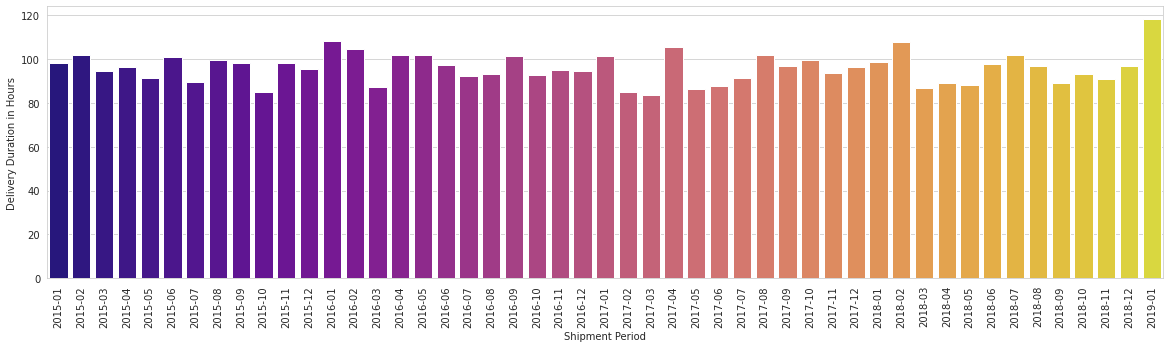

In [51]:
#Vẽ biểu đồ thể hiện sự biến thiên của thời gian giao hàng trung bình hàng tháng
sns.set_style('whitegrid')
sns.axes_style(style='ticks')
fig, ax = plt.subplots(1, figsize=(20,5))

sns.barplot(x = 'Shipment Period', y='Delivery Duration in Hours', data=average_delivery_duration_by_month, 
            palette='plasma', ax=ax)

plt.xticks(rotation=90)
plt.show()

####**5) Vẽ biểu đồ thể hiện sức mua theo từng thành phố. Cho biết top 3 thành phố có doanh số thấp nhất và 3 thành phố có doanh số cao nhất.**

In [52]:
total_sale_by_city = processed_df.groupby('City')['Sales'].sum().reset_index(name='Total Sales')
total_sale_by_city

,City,Total Sales
0,Aberdeen,25.500
1,Abilene,1.392
2,Akron,2724.244
3,Albuquerque,2220.160
4,Alexandria,5519.570
...,...,...
524,Woonsocket,195.550
525,Yonkers,7657.666
526,York,817.978
527,Yucaipa,50.800


In [53]:
#Vẽ biểu đồ thể hiện sức mua theo từng thành phố
from matplotlib.pyplot import figure

figure(num=None, figsize=(30,100), dpi=200, facecolor='w', edgecolor='r')
sns.barplot(x="Total Sales", y = "City" , data = total_sale_by_city)
plt.show()

Output hidden; open in https://colab.research.google.com to view.

In [54]:
#Cho biết top 3 thành phố có doanh số thấp nhất và 3 thành phố có doanh số cao nhất.
total_sale_by_city.sort_values(by=['Total Sales'],inplace=True, ascending=False)
print("Top 3 thành phố có doanh số cao nhất: \n" + str(total_sale_by_city.head(3)))
print("\n\nTop 3 thành phố có doanh số thấp nhất: \n" + str(total_sale_by_city.tail(3)))

Top 3 thành phố có doanh số cao nhất: 
              City  Total Sales
327  New York City   252462.547
265    Los Angeles   173420.181
450        Seattle   116106.322


Top 3 thành phố có doanh số thấp nhất: 
        City  Total Sales
221  Jupiter        2.064
140   Elyria        1.824
1    Abilene        1.392


####**6) Vẽ biểu đồ thể hiện tỉ trọng doanh số theo bang (state) và cho biết trung bình doanh số của 5 bang dẫn đầu về sức mua.**

In [55]:
total_sale_by_state = processed_df.groupby(['State'])['Sales'].sum().reset_index(name='Total Sales')
total_sale_by_state

,State,Total Sales
0,Alabama,19510.6400
1,Arizona,35272.6570
2,Arkansas,11678.1300
3,California,446306.4635
4,Colorado,31841.5980
5,Connecticut,13384.3570
6,Delaware,27322.9990
7,District of Columbia,2865.0200
8,Florida,88436.5320
9,Georgia,48219.1100


In [56]:
#Vẽ biểu đồ thể hiện tỉ trọng doanh số theo bang (state).
import plotly.express as px
fig = px.pie(total_sale_by_state, values='Total Sales', names='State', 
            color_discrete_sequence=px.colors.sequential.RdBu,
            width = 1000, height=1000, title = 'Distribution of Sales across States')
fig.update_traces(
    textposition='inside', 
    textinfo='percent+label',
    hovertemplate="<br>".join([
        "State: %{label}",
        "Sales: %{value}",
        "Percent: %{percent}"
    ])
)
fig.show()

In [57]:
total_sale_by_state.sort_values(by=['Total Sales'],inplace=True, ascending=False)
top_5_states_in_sales_df = processed_df.loc[processed_df['State'].isin(total_sale_by_state.head(5).get('State'))]
top_5_states_in_sales_df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Order by Year,Order by Month
7980,7981,CA-2015-103800,2015-01-03,2015-01-07,Standard Class,DP-13000,Darren Powers,Consumer,United States,Houston,Texas,77095.0,Central,OFF-PA-10000174,Office Supplies,Paper,"Message Book, Wirebound, Four 5 1/2"" X 4"" Form...",16.448,2015,1
1759,1760,CA-2015-141817,2015-01-05,2015-01-12,Standard Class,MB-18085,Mick Brown,Consumer,United States,Philadelphia,Pennsylvania,19143.0,East,OFF-AR-10003478,Office Supplies,Art,Avery Hi-Liter EverBold Pen Style Fluorescent ...,19.536,2015,1
5327,5328,CA-2015-130813,2015-01-06,2015-01-08,Second Class,LS-17230,Lycoris Saunders,Consumer,United States,Los Angeles,California,90049.0,West,OFF-PA-10002005,Office Supplies,Paper,Xerox 225,19.440,2015,1
7661,7662,CA-2015-105417,2015-01-07,2015-01-12,Standard Class,VS-21820,Vivek Sundaresam,Consumer,United States,Huntsville,Texas,77340.0,Central,OFF-BI-10003708,Office Supplies,Binders,Acco Four Pocket Poly Ring Binder with Label H...,10.430,2015,1
7660,7661,CA-2015-105417,2015-01-07,2015-01-12,Standard Class,VS-21820,Vivek Sundaresam,Consumer,United States,Huntsville,Texas,77340.0,Central,FUR-FU-10004864,Furniture,Furnishings,"Howard Miller 14-1/2"" Diameter Chrome Round Wa...",76.728,2015,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296,1297,CA-2018-115427,2018-12-30,2019-01-03,Standard Class,EB-13975,Erica Bern,Corporate,United States,Fairfield,California,94533.0,West,OFF-BI-10002103,Office Supplies,Binders,"Cardinal Slant-D Ring Binder, Heavy Gauge Vinyl",13.904,2018,12
907,908,CA-2018-143259,2018-12-30,2019-01-03,Standard Class,PO-18865,Patrick O'Donnell,Consumer,United States,New York City,New York,10009.0,East,TEC-PH-10004774,Technology,Phones,Gear Head AU3700S Headset,90.930,2018,12
1297,1298,CA-2018-115427,2018-12-30,2019-01-03,Standard Class,EB-13975,Erica Bern,Corporate,United States,Fairfield,California,94533.0,West,OFF-BI-10004632,Office Supplies,Binders,GBC Binding covers,20.720,2018,12
906,907,CA-2018-143259,2018-12-30,2019-01-03,Standard Class,PO-18865,Patrick O'Donnell,Consumer,United States,New York City,New York,10009.0,East,FUR-BO-10003441,Furniture,Bookcases,"Bush Westfield Collection Bookcases, Fully Ass...",323.136,2018,12


In [58]:
average_sale_of_top_5_states_in_sales = top_5_states_in_sales_df.groupby(['State'])['Sales'].mean().reset_index(name='Average Sales')

In [59]:
#Cho biết trung bình doanh số của 5 bang dẫn đầu về sức mua.
print("Trung bình doanh số của 5 bang dẫn đầu về sức mua \n") 
average_sale_of_top_5_states_in_sales

Trung bình doanh số của 5 bang dẫn đầu về sức mua 



,State,Average Sales
0,California,229.345562
1,New York,279.271784
2,Pennsylvania,199.788058
3,Texas,173.250290
4,Washington,268.267560


####**7) Cho biết các bang dẫn đầu doanh số theo từng vùng (east, west, south, central,..).**

In [60]:
total_sale_by_state_and_region = processed_df.groupby(['State', 'Region'])['Sales'].sum().reset_index(name='Total Sales')
total_sale_by_state_and_region

,State,Region,Total Sales
0,Alabama,South,19510.6400
1,Arizona,West,35272.6570
2,Arkansas,South,11678.1300
3,California,West,446306.4635
4,Colorado,West,31841.5980
5,Connecticut,East,13384.3570
6,Delaware,East,27322.9990
7,District of Columbia,East,2865.0200
8,Florida,South,88436.5320
9,Georgia,South,48219.1100


In [61]:
#Các bang dẫn đầu doanh số tại vùng Phía Đông
top_5_total_sale_by_state_in_east = total_sale_by_state_and_region.query('Region == "East"').nlargest(5 , 'Total Sales')
top_5_total_sale_by_state_in_east

,State,Region,Total Sales
30,New York,East,306361.147
36,Pennsylvania,East,116276.650
33,Ohio,East,75130.350
28,New Jersey,East,34610.972
19,Massachusetts,East,28634.434


In [62]:
#Các bang dẫn đầu doanh số tại vùng Phía Tây
top_5_total_sale_by_state_in_west = total_sale_by_state_and_region.query('Region == "West"').nlargest(5 , 'Total Sales')
top_5_total_sale_by_state_in_west

,State,Region,Total Sales
3,California,West,446306.4635
45,Washington,West,135206.8500
1,Arizona,West,35272.6570
4,Colorado,West,31841.5980
35,Oregon,West,17284.4620


In [63]:
#Các bang dẫn đầu doanh số tại vùng Phía Nam
top_5_total_sale_by_state_in_south = total_sale_by_state_and_region.query('Region == "South"').nlargest(5 , 'Total Sales')
top_5_total_sale_by_state_in_south

,State,Region,Total Sales
8,Florida,South,88436.532
44,Virginia,South,70636.720
31,North Carolina,South,55165.964
9,Georgia,South,48219.110
15,Kentucky,South,36458.390


In [64]:
#Các bang dẫn đầu doanh số tại vùng Trung tâm
top_5_total_sale_by_state_in_central = total_sale_by_state_and_region.query('Region == "Central"').nlargest(5 , 'Total Sales')
top_5_total_sale_by_state_in_central

,State,Region,Total Sales
41,Texas,Central,168572.5322
11,Illinois,Central,79236.5170
20,Michigan,Central,76136.0740
12,Indiana,Central,48718.4000
47,Wisconsin,Central,31173.4300


####**8) Cho biết top 3 sản phẩm có doanh thu cao nhất và top 3 sản phẩm có số lượng đơn vị bán ra cao nhất.**

In [65]:
#Top 3 sản phẩm có doanh thu cao nhất.
top_3_total_sales_by_product_id = processed_df.groupby('Product ID')['Sales'].sum().reset_index(name='Total Sales').nlargest(3, 'Total Sales')
top_3_total_sales_by_product_id

,Product ID,Total Sales
1613,TEC-CO-10004722,61599.824
776,OFF-BI-10003527,27453.384
1641,TEC-MA-10002412,22638.480


In [66]:
#Top 3 sản phẩm có số lượng đơn vị bán ra cao nhất.
top_3_sold_by_product_id = processed_df.groupby('Product ID')['Sales'].count().reset_index(name='Sold Items').nlargest(3, 'Sold Items')
top_3_sold_by_product_id

,Product ID,Sold Items
1144,OFF-PA-10001970,19
1568,TEC-AC-10003832,18
295,FUR-FU-10004270,16


####**9) Vẽ biểu đồ thể hiện tỉ trọng doanh số của từng category.**

In [67]:
#Vẽ biểu đồ thể hiện tỉ trọng doanh số của từng category.
import plotly.express as px

total_sale_by_category = processed_df.groupby('Category')['Sales'].sum().reset_index(name='Total Sales')
fig = px.pie(total_sale_by_category, values='Total Sales', names='Category', 
            color_discrete_sequence=px.colors.sequential.RdBu,
            width = 500, height=500, title = 'Distribution of Sales across Categories')
fig.show()